In [1]:
import numpy as np

In [3]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=1):
    """
    Implements stochastic gradient descent for linear regression.
    Args:
        X: Feature matrix (n_samples, n_features)
        y: Target vector (n_samples,)
        lr: Learning rate
        epochs: Number of passes over the data
        batch_size: Number of samples per batch (1 for true SGD)
    Returns:
        weights: Learned weights
        bias: Learned bias
    """
    n_samples, n_features = X.shape
    # Initialize weights and bias
    weights = np.zeros(n_features)
    bias = 0
    history = dict()

    for epoch in range(epochs):
        # Shuffle data at each epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Predict
            y_pred = np.dot(X_batch, weights) + bias

            # Compute gradients
            error = y_pred - y_batch
            grad_w = np.dot(X_batch.T, error) / batch_size
            grad_b = np.sum(error) / batch_size

            # Update weights and bias
            weights -= lr * grad_w
            bias -= lr * grad_b

        # Record history
        history[epoch] = (weights.copy(), bias, error)

    return weights, bias, history

In [4]:
# Generate dummy data
X = np.random.rand(100, 2)
true_w = np.array([2, -3])
true_b = 5
y = X @ true_w + true_b + np.random.randn(100) * 0.5

In [ ]:
# Train using SGD
w_learned, b_learned, history = stochastic_gradient_descent(X, y, lr=0.1, epochs=50)
print("Learned weights:", w_learned)
print("Learned bias:", b_learned)

Learned weights: [ 2.18918792 -3.1762388 ]
Learned bias: 4.9769521431092825


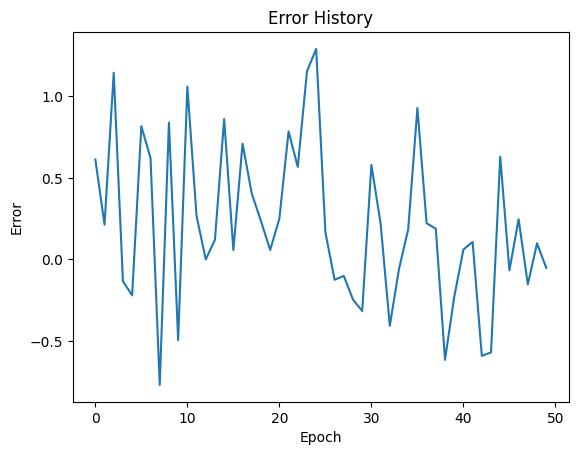

In [6]:
# Plot error history graph
import matplotlib.pyplot as plt

plt.plot([epoch for epoch in history.keys()], [entry[2] for entry in history.values()])
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error History")
plt.show()